In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('0.jpg')

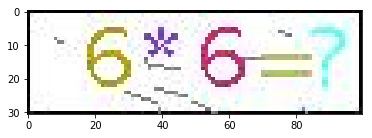

In [4]:
plt.imshow(img)

In [8]:
img.shape

(31, 100, 3)

In [ ]:
img[0]

In [19]:
img_copy= img.copy()

In [28]:
img= img_copy.copy()

In [11]:
h,w=img.shape[0],img.shape[1]

In [31]:
for i in range(h):
    for j in range(w):
#         print(img[i][j])
        r=img[i][j][0]
        g=img[i][j][1]        
        b=img[i][j][2] 
        if 90<r<130 and 90<b<130 and 90<g<130:
            print('change')
            img[i][j][0]=255
            img[i][j][1]=255
            img[i][j][2]=255
            

change
change


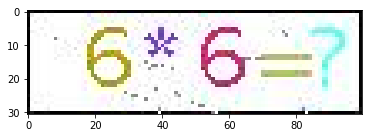

In [32]:
plt.imshow(img)

In [18]:
img[16][36]

array([116, 117, 113], dtype=uint8)

In [ ]:
14,32,49,67

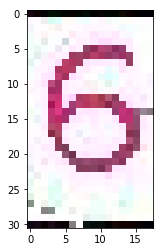

In [36]:
plt.imshow(img[:,49:67,:])

In [37]:
import time

In [69]:
img=cv2.imread('1.jpg')

In [80]:
new_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

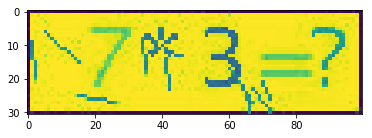

In [81]:
plt.imshow(new_img)

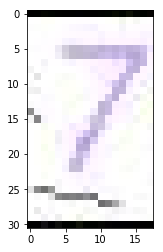

In [82]:

plt.imshow(img[:,14:32,:])


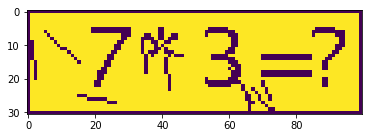

In [86]:
plt.imshow(cv2.threshold(new_img,220,255,0)[1])

In [ ]:
t=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
t=cv2.resize(t,(18,h))
ret,thresh=cv2.threshold(t,127,255,0)

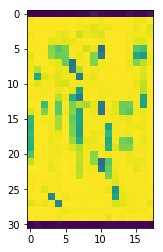

In [68]:
plt.imshow(t)

In [161]:
def pic_change(img):
    t=cv2.resize(img,(18,h))
    ret,thresh=cv2.threshold(t,220,255,0)
    return thresh

In [56]:
img=cv2.imread('1.jpg')

In [60]:
img

array([[[  0,   0,   0],
        [ 12,  12,  12],
        [  0,   0,   0],
        ...,
        [ 15,  15,  15],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  2,   2,   2],
        [249, 249, 249],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [246, 246, 246],
        [  6,   6,   6]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [241, 241, 241],
        [255, 255, 255],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0]],

       [[ 20,  20,  20],
        [248, 248, 248],
        [255, 255, 255],
        ...,
        [250, 250, 250],
        [234, 234, 234],
        [ 19,  19,  19]],

       [[  0,   0,   0],
        [ 27,  27,  27],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [ 30,  30,  30],
        [  0,   0,   0]]

In [94]:
for i in range(900):
    try:
        img=cv2.imread(f'{i}.jpg')
    except Exception as e:
        continue
    if img is None:
        continue
    else:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        i1=pic_change(img[:,14:32])
        i2=pic_change(img[:,33:48])
        i3=pic_change(img[:,49:67])
        x=int(time.time()*10000)
        cv2.imwrite('{}-1.jpg'.format(i),i1)    
        cv2.imwrite('{}-2.jpg'.format(i),i2)
        cv2.imwrite('{}-3.jpg'.format(i),i3)
        time.sleep(0.01)
    

    

In [38]:
imx=cv2.imread('0.jpg')

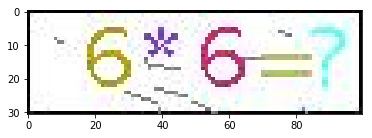

In [39]:
plt.imshow(imx)

In [114]:
import os
current_path = os.getcwd()

In [128]:
lable=['0','1','2','3','4','5','6','7','8','9','10','11']

In [106]:
filename='73-3.jpg'

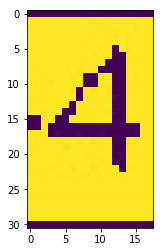

In [107]:
# def get_training_data(filename):
im=cv2.imread(filename)
im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.imshow(im_gray) 

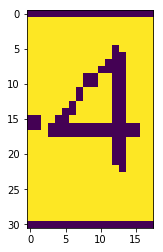

In [112]:
ret,thresh=cv2.threshold(im_gray,127,255,0)
plt.imshow(thresh)

In [ ]:
thresh

In [166]:
dataset=[]
labels=[]
root_folder=r'C:\git\image_recognise\boc\train'
for l in lable:
    path=os.path.join(root_folder,l)
    for file in os.listdir(path)[:50]:
#         print(file)
        full_path = os.path.join(root_folder,path,file)
        im=cv2.imread(full_path)
        im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        ret,thresh=cv2.threshold(im_gray,127,255,0)
        dataset.append(thresh)
        labels.append(l)
        

In [119]:
len(dataset)

600

In [130]:
import numpy as np

In [167]:
np_dataset = np.array(dataset)
np_labels=np.array(labels)
X=np_dataset.copy()
y=np_labels.copy()

In [132]:
from sklearn.cross_validation import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
import pandas as pd
from keras.models import load_model

In [133]:
np_dataset[0].shape

(31, 18)

In [134]:
h=31
w=18

In [168]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train_4D = X_train.reshape(X_train.shape[0],h,w,1).astype('float32')
X_test_4D = X_test.reshape(X_test.shape[0],h,w,1).astype('float32')
X_train_4D_normal=X_train_4D/255
X_test_4D_normal=X_test_4D/255
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [136]:
from keras.models import Sequential

In [137]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [169]:
model = Sequential()

In [170]:
model.add(
   Conv2D(
   filters=16,
   kernel_size=(5,5),
   padding='same',
   input_shape=(h,w,1),
   activation='relu',
   )
)

In [171]:
model.add(
MaxPooling2D(pool_size=(2,2))
)

In [172]:
model.add(
MaxPooling2D(pool_size=(2,2))
)

In [173]:
model.add(Dropout(0.25))

In [174]:
model.add(Flatten())

In [175]:
model.add(
Dense(
128,activation='relu'
)
)

In [176]:
model.add(Dropout(0.5))

In [177]:
model.add(
Dense(
12,
    activation='softmax'
)
)

In [178]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 31, 18, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 9, 16)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 4, 16)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 448)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               57472     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [179]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [180]:
history_train = model.fit(x=X_train_4D_normal,
                         y=y_train_onehot,
                         validation_split=0.2,
                          epochs=10,
                          batch_size=100,
                          verbose = 2,
                         )

Train on 384 samples, validate on 96 samples
Epoch 1/10
 - 0s - loss: 2.6268 - acc: 0.0938 - val_loss: 2.4517 - val_acc: 0.0312
Epoch 2/10
 - 0s - loss: 2.4756 - acc: 0.1146 - val_loss: 2.3631 - val_acc: 0.2083
Epoch 3/10
 - 0s - loss: 2.3643 - acc: 0.1667 - val_loss: 2.2495 - val_acc: 0.3958
Epoch 4/10
 - 0s - loss: 2.2846 - acc: 0.1927 - val_loss: 2.1323 - val_acc: 0.6458
Epoch 5/10
 - 0s - loss: 2.1397 - acc: 0.3255 - val_loss: 1.9795 - val_acc: 0.7708
Epoch 6/10
 - 0s - loss: 2.0031 - acc: 0.3958 - val_loss: 1.8141 - val_acc: 0.7917
Epoch 7/10
 - 0s - loss: 1.8441 - acc: 0.5182 - val_loss: 1.6414 - val_acc: 0.7917
Epoch 8/10
 - 0s - loss: 1.7074 - acc: 0.5547 - val_loss: 1.4312 - val_acc: 0.8229
Epoch 9/10
 - 0s - loss: 1.5664 - acc: 0.5729 - val_loss: 1.1987 - val_acc: 0.9688
Epoch 10/10
 - 0s - loss: 1.3753 - acc: 0.6823 - val_loss: 0.9955 - val_acc: 0.9896


In [181]:
score = model.evaluate(X_test_4D_normal,y_test_onehot)

120/120 [==============================] - 0s 108us/step


In [182]:
score

[1.1021118720372518, 0.9916666666666667]

In [183]:
prediction = model.predict_classes(X_test_4D_normal)

In [184]:
prediction

array([ 4,  5,  3,  1,  6,  0,  2,  5,  5,  0,  8, 11,  4,  2, 10,  5,  2,
       11, 10, 11,  8,  9,  7, 10, 11,  5,  8,  4, 10,  0,  3,  2, 11,  0,
        5,  8, 11, 10, 10,  4,  1, 11,  6,  6,  5,  1, 11,  3,  2,  8,  2,
       11,  0, 10,  2,  3,  9,  4, 11,  4,  9,  3,  2,  3,  9,  3,  6,  6,
       11,  7,  9,  7,  8,  7,  8, 11, 10,  0,  4,  6, 10,  8,  2, 10,  6,
       11,  2,  0,  1,  5,  7,  7,  6,  4,  3,  8,  0,  5,  3,  1,  3,  6,
        3,  7, 10,  6,  9,  6,  3, 11, 10,  8,  2,  5,  8, 10,  5,  3,  5,
        2], dtype=int64)

In [185]:
import pandas as pd
pd.crosstab(y_test,prediction)

col_0,0,1,2,3,4,5,6,7,8,9,10,11
row_0,,,,,,,,,,,,
0,8,0,0,0,0,0,0,0,0,0,0,0
1,0,5,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,13,0
11,0,0,0,0,1,0,0,0,0,0,0,14
2,0,0,12,0,0,0,0,0,0,0,0,0
3,0,0,0,13,0,0,0,0,0,0,0,0
4,0,0,0,0,7,0,0,0,0,0,0,0
5,0,0,0,0,0,12,0,0,0,0,0,0
6,0,0,0,0,0,0,11,0,0,0,0,0


In [163]:
map_dict={}
for i in range(10):
    map_dict[str(i)] = i

In [164]:
map_dict

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [191]:
def regnize(full_path):
    img=cv2.imread(full_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    i1=pic_change(img[:,14:32])
    i2=pic_change(img[:,33:48])
    i3=pic_change(img[:,49:67])
#     im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
#     ret,thresh=cv2.threshold(im_gray,127,255,0)
    true_data = [i1,i2,i3]
    np_true_data=np.array(true_data)
    X_v=np_true_data.reshape(np_true_data.shape[0],h,w,1).astype('float32')
    X_nor=X_v/255
    y_pre=model.predict_classes(X_nor)
    return y_pre
full_path=r'C:\git\image_recognise\boc\68.jpg'
result = regnize(full_path)
if result[1]==11:
    cal_result = result[0]*result[2]
else:
    cal_result = result[0]+result[2]
    
# for index,i in enumerate(result):
    
print(cal_result)

16


In [206]:
model.save('boc.h5')

In [189]:
result[2]

6

In [188]:
result

array([ 4, 11,  6], dtype=int64)

In [199]:
test_model=load_model('boc.h5')

In [203]:
def regnize_jw(full_path):
    img=cv2.imread(full_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    i1=pic_change(img[:,14:32])
    i2=pic_change(img[:,33:48])
    i3=pic_change(img[:,49:67])
#     im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
#     ret,thresh=cv2.threshold(im_gray,127,255,0)
    true_data = [i1,i2,i3]
    np_true_data=np.array(true_data)
    X_v=np_true_data.reshape(np_true_data.shape[0],h,w,1).astype('float32')
    X_nor=X_v/255
    result=test_model.predict_classes(X_nor)
    if result[1]==11:
        cal_result = result[0]*result[2]
    else:
        cal_result = result[0]+result[2]
    print(result)
    return cal_result


In [205]:
full_path=r'C:\git\image_recognise\boc\803.jpg'
cal_result = regnize_jw(full_path)  
print(cal_result)

[ 3 11  9]
27


In [207]:
img_str='/9j/4AAQSkZJRgABAgAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAAfAGQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD0PwX4L8K3XgXw9cXHhrRpp5dMtnkkksImZ2MSkkkrkknnNbn/AAgng/8A6FTQ/wDwXQ//ABNHgT/knnhr/sFWv/opa6CgDjtQ8OeDLCdYB4J0+6kK72W20iJ9gJIGfl74P5Gl0/w54F1GR4U8J6PDcxjL28+lxJIo7Ejb9OnqPWum1C++wQLL9lubnLbdltHvYcHnHpx+tY2j3K6l4iu7yX9xcRwCGO1cFZFj3E7nBHU/KeCQAeawlNqaV9+h0xpxlScrbdb/AKGdqfhXwfp7yzDw94dYW9ubiazOnQeYY1zl04yO/UEEgD5eTUcGkeArq0guIfCuiASIkrxS6dFHIkTYHmbSvKgkZYfLgMcnGDseJNGk1OWza1sbR7gSqHu5TgxRjkqVAzIjKXUpkD5vqQ/w/o/9mz3jS6fbRyB9kd2j7nnjwMZGBsAAQbRhcqcKBiuzlhyX6nMZ+q+HPAGh2JvNS8O6BbwBgu5tOiJJPQABSSfp2BPasSGDwLcTx2tz4DTSjcsIYZ7vQokVpGOFUHaw3d+Rjg5qz4kuoNI1bw7JcQ3X9k6ZNL56vHuWMEBYZMdGCkjDDJXIB+ZsG94u8SaDP4V1G2jvLXUJZ4HSOC2dZm3bSQ5AJwFxuLHpt9cU4wTS0vc551GnLW1vxLNr4A8NRb1uPDvh+deAhGkxI2P9o4IJ6dAo68elj/hBPB//AEKmh/8Aguh/+Jq5pF9NN4X06+uA888tpDJJ5aDLMygk4HHU5qLUtSdtKvFjt7yBzA4WVk2iM7Thic8Y65rmqVYU3yyZr7SPUytV8M+CtJtVmk8HaXcM7iOOG20qKSR2wTgDb2AJ+grOsrLwFc3kVpdeCrHTZp22wLf6PFEJj3CnaRnp1x1GM5rtba8+0SFPs1xFgZ3Sx7RWDKp8WatZy28jLo+nXHnCYYxdTqeNnH3F5BbockDpka0pQnG/Tud2GVGpB860X2r/AHaW69vXbdfPnx90nTdG8dWNvpen2ljA2mRu0drCsSlvNlGSFAGcADPsKKuftHf8lD0//sFR/wDo2WipOQ9/8Cf8k88Nf9gq1/8ARS10FeT+E/i34N0/wbodlLq376y0+3jvR9nm/cbY1Qn7nzfPtXjP3s9BWx/wu34ef9DD/wCSVx/8boA6/UNVk0+dUOm3lxGy5WS2Tfzk5BGeO31yfSs23E+seIbXUDps1nBaLIoknUK8pIACleoAyxB5HXpWF/wu34ef9DD/AOSVx/8AG6P+F2/Dz/oYf/JK4/8AjdZypuT1ehtGqorSOtrXPQKK8/8A+F2/Dz/oYf8AySuP/jdH/C7fh5/0MP8A5JXH/wAbrQxOn8S3Mlppsc8elXOohZ1EiWrlZo1OQXTHJIzjAIyGOSBmuJCLqOpQaXo+gT6Ot/Abe+uL2zjtnaBTl/KAGC7AkHg9FOBjIv8A/C7fh5/0MP8A5JXH/wAbqOf4zfDa5haG41uOWJvvJJYTsp78gx1cZ8q2Mp0+Z6vQ71rfZaC3tCtsEULHsQYQDsF6YxxVWSxvZY2jk1BXRwVZWt1IIPUEVwUfxZ+G0EivbeJ7mAKR8iwXLJt/uhGQqo/3QCOgIq9/wu34ef8AQw/+SVx/8brCdKM3d3+9r8mW4J/8OzsYmntr6KG5u2lEyNs/dKq7hg4znrjJA9FY9qoeH3a28MWZttFmtFBfNi0h8yMbm6F8ZycHkjg+wB5tvjT8OXZGbXlYodyk2M52nBGR+744JH407/hdvw8/6GH/AMkrj/43VwShHlX5t/maRly03BdWnu+l/wDP5fNnknx9trrV/HVjPYWd3PGumRo5W3fKN5spwwIyDgg4PYg9CKKw/jX4p0bxd4ys7/Q7z7Xax6ekLP5Tx4cSSEjDgHow/OimSf/Z'

In [208]:
import base64

In [209]:
img_data = base64.b64decode(img_str)
    # 转换为np数组
img_array = np.fromstring(img_data, np.uint8)
    # 转换成opencv可用格式
img = cv2.imdecode(img_array, cv2.COLOR_RGB2BGR)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


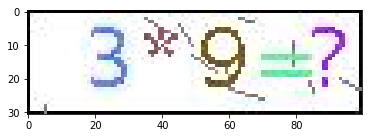

In [210]:
plt.imshow(img)

In [211]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
i1=pic_change(img[:,14:32])
i2=pic_change(img[:,33:48])
i3=pic_change(img[:,49:67])
#     im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
#     ret,thresh=cv2.threshold(im_gray,127,255,0)
true_data = [i1,i2,i3]
np_true_data=np.array(true_data)
X_v=np_true_data.reshape(np_true_data.shape[0],h,w,1).astype('float32')
X_nor=X_v/255
result=test_model.predict_classes(X_nor)
if result[1]==11:
    cal_result = result[0]*result[2]
else:
    cal_result = result[0]+result[2]
print(result)


[ 3 11  9]
